In [2]:
!pip install utide
!pip show utide

Name: UTide
Version: 0.3.0
Summary: Python distribution of the MatLab package UTide
Home-page: https://github.com/wesleybowman/UTide
Author: Wesley Bowman
Author-email: wesley.bowman23@gmail.com
License: MIT
Location: C:\Users\USKD712889\AppData\Local\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [2]:
%matplotlib inline

import datetime

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import utide

print(utide.__version__)

0.3.0


In [3]:
import scipy as sci
import pandas as pd
import numpy as np
from utide import solve, reconstruct
import matplotlib.pyplot as plt

# Step 1: Load the CSV Data
# Replace 'your_file.csv' with your actual file path
data = pd.read_csv(r'C:\Users\USKD712889\OneDrive - WSP O365\Documents\Projects\Monroe County\Duck Key\Delft3D\DK5_water level (points).csv', parse_dates=['date and time'])

time = data['date and time']
water_level = data['water level (points) (m)']

print(data['water level (points) (m)'].isna().sum())  # Check for NaN values

0


prep/calcs ... done.


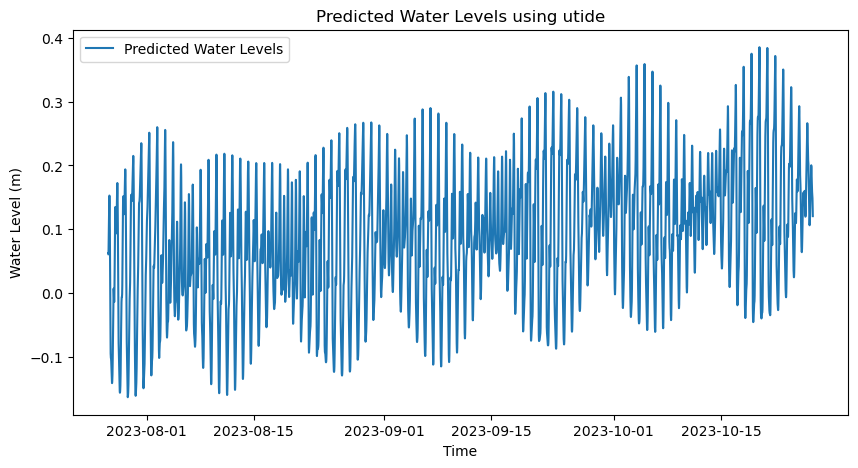

Constituent: O1, Amplitude: 0.07, Phase: 261.87
Constituent: M2, Amplitude: 0.06, Phase: 264.41
Constituent: K1, Amplitude: 0.06, Phase: 262.21
Constituent: M4, Amplitude: 0.03, Phase: 150.45
Constituent: S2, Amplitude: 0.02, Phase: 319.55
Constituent: MS4, Amplitude: 0.02, Phase: 303.56
Constituent: MSF, Amplitude: 0.02, Phase: 13.19
Constituent: Q1, Amplitude: 0.02, Phase: 257.44
Constituent: MK3, Amplitude: 0.01, Phase: 228.97
Constituent: N2, Amplitude: 0.01, Phase: 228.08
Constituent: MN4, Amplitude: 0.01, Phase: 276.32
Constituent: MU2, Amplitude: 0.01, Phase: 108.05
Constituent: MO3, Amplitude: 0.01, Phase: 232.41
Constituent: M6, Amplitude: 0.01, Phase: 103.26
Constituent: MM, Amplitude: 0.01, Phase: 2.27
Constituent: NO1, Amplitude: 0.01, Phase: 303.27
Constituent: L2, Amplitude: 0.01, Phase: 284.44
Constituent: J1, Amplitude: 0.00, Phase: 310.92
Constituent: M3, Amplitude: 0.00, Phase: 130.49
Constituent: M8, Amplitude: 0.00, Phase: 108.77
Constituent: S4, Amplitude: 0.00, Ph

In [13]:
obs = r'C:\Users\USKD712889\OneDrive - WSP O365\Documents\Projects\Monroe County\Duck Key\Delft3D\DK5_water level (points).csv'
coef = utide.solve(
    time, 
    water_level,
    lat=24.771,
    method="ols",
    conf_int="MC",
    verbose=False,
)

reconstructed = reconstruct(time, coef)
predicted_water_level = reconstructed['h']  # Predicted heights

#Plot the results
plt.figure(figsize=(10, 5))
plt.plot(time, predicted_water_level, label="Predicted Water Levels")
plt.xlabel("Time")
plt.ylabel("Water Level (m)")
plt.title("Predicted Water Levels using utide")
plt.legend()
plt.show()

# Extract amplitudes, phases, and constituent names
amps = coef['A']
phases = coef['g']
constituents = coef['name']

# Print constituent information
for i, constituent in enumerate(constituents):
    print(f"Constituent: {constituent}, Amplitude: {amps[i]:.2f}, Phase: {phases[i]:.2f}")

# Reconstruct the tidal heights using the coefficients
predicted = reconstruct(time, coef)
predicted_heights = predicted['h']

# Calculate tidal datums
# Mean Sea Level (MSL)
msl = np.mean(predicted_heights)

# Calculate other datums relative to MSL
hat = np.max(predicted_heights) #- msl  # HAT relative to MSL
lat = np.min(predicted_heights) #- msl  # LAT relative to MSL

# Mean Higher High Water (MHHW) - average of daily higher high water values relative to MSL
high_tides = predicted_heights[predicted_heights >= np.percentile(predicted_heights, 50)]
mhhw = np.mean(high_tides) #- msl

# Mean Low Water (MLW) - average of all low tides relative to MSL
low_tides = predicted_heights[predicted_heights <= np.percentile(predicted_heights, 50)]
mlw = np.mean(low_tides) #- msl

# Mean Lower Low Water (MLLW) - average of daily lower low water values relative to MSL
lower_low_tides = predicted_heights[predicted_heights <= np.percentile(predicted_heights, 25)]
mllw = np.mean(lower_low_tides) #- msl

# Print results relative to MSL
print(f"Mean Sea Level (MSL): {msl:.2f}")
print(f"Highest Astronomical Tide (HAT): {hat:.2f}")
print(f"Mean Higher High Water (MHHW): {mhhw:.2f}")
print(f"Mean Low Water (MLW): {mlw:.2f}")
print(f"Mean Lower Low Water (MLLW): {mllw:.2f}")
print(f"Lowest Astronomical Tide (LAT): {lat:.2f}")

In [49]:
#Vaca Key
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utide
import scipy as sci
from utide import solve, reconstruct
import matplotlib.pyplot as plt
import scipy as sci
import pandas as pd
import numpy as np
from utide import solve, reconstruct
import matplotlib.pyplot as plt

# Step 1: Load the CSV Data
# Replace 'your_file.csv' with your actual file path
data = pd.read_csv(r'C:\Users\USKD712889\OneDrive - WSP O365\Documents\Projects\Monroe County\Duck Key\Delft3D\vaca_waterlevel_output.csv', parse_dates=['date and time'])

time = data['date and time']
water_level = data['water level (points) (m)']

print(data['water level (points) (m)'].isna().sum())  # Check for NaN values
obs = r'C:\Users\USKD712889\OneDrive - WSP O365\Documents\Projects\Monroe County\Duck Key\Delft3D\vaca_waterlevel_output.csv'
coef = utide.solve(
    time, 
    water_level,
    lat=24.771,
    method="ols",
    conf_int="MC",
    verbose=False,
)

reconstructed = reconstruct(time, coef)
predicted_water_level = reconstructed['h']  # Predicted heights

0
prep/calcs ... done.


In [50]:
# Extract amplitudes, phases, and constituent names
amps = coef['A']
phases = coef['g']
constituents = coef['name']

# Print constituent information
for i, constituent in enumerate(constituents):
    print(f"Constituent: {constituent}, Amplitude: {amps[i]:.2f}, Phase: {phases[i]:.2f}")

Constituent: O1, Amplitude: 0.08, Phase: 262.35
Constituent: M2, Amplitude: 0.06, Phase: 264.42
Constituent: K1, Amplitude: 0.06, Phase: 262.67
Constituent: M4, Amplitude: 0.03, Phase: 151.10
Constituent: S2, Amplitude: 0.02, Phase: 320.20
Constituent: MS4, Amplitude: 0.02, Phase: 305.14
Constituent: MSF, Amplitude: 0.02, Phase: 13.24
Constituent: Q1, Amplitude: 0.02, Phase: 257.82
Constituent: M6, Amplitude: 0.01, Phase: 139.55
Constituent: MK3, Amplitude: 0.01, Phase: 230.25
Constituent: N2, Amplitude: 0.01, Phase: 228.33
Constituent: MN4, Amplitude: 0.01, Phase: 277.58
Constituent: MU2, Amplitude: 0.01, Phase: 109.48
Constituent: MO3, Amplitude: 0.01, Phase: 234.49
Constituent: MM, Amplitude: 0.01, Phase: 2.14
Constituent: NO1, Amplitude: 0.01, Phase: 304.02
Constituent: L2, Amplitude: 0.01, Phase: 285.00
Constituent: J1, Amplitude: 0.00, Phase: 310.54
Constituent: M8, Amplitude: 0.00, Phase: 289.71
Constituent: M3, Amplitude: 0.00, Phase: 129.59
Constituent: S4, Amplitude: 0.00, Ph

In [53]:
import numpy as np

# Step 2: Reconstruct the tidal heights using the coefficients
predicted = reconstruct(time, coef)
predicted_heights = predicted['h']

# Step 3: Calculate tidal datums
# Mean Sea Level (MSL)
msl = np.mean(predicted_heights)

# Calculate other datums relative to MSL
hat = np.max(predicted_heights) #- msl  # HAT relative to MSL
lat = np.min(predicted_heights) #- msl  # LAT relative to MSL

# Mean Higher High Water (MHHW) - average of daily higher high water values relative to MSL
high_tides = predicted_heights[predicted_heights >= np.percentile(predicted_heights, 50)]
mhhw = np.mean(high_tides) #- msl

# Mean Low Water (MLW) - average of all low tides relative to MSL
low_tides = predicted_heights[predicted_heights <= np.percentile(predicted_heights, 50)]
mlw = np.mean(low_tides) #- msl

# Mean Lower Low Water (MLLW) - average of daily lower low water values relative to MSL
lower_low_tides = predicted_heights[predicted_heights <= np.percentile(predicted_heights, 25)]
mllw = np.mean(lower_low_tides) #- msl

# Print results relative to MSL
print(f"Mean Sea Level (MSL): {msl:.2f}")
print(f"Highest Astronomical Tide (HAT): {hat:.2f}")
print(f"Mean Higher High Water (MHHW): {mhhw:.2f}")
print(f"Mean Low Water (MLW): {mlw:.2f}")
print(f"Mean Lower Low Water (MLLW): {mllw:.2f}")
print(f"Lowest Astronomical Tide (LAT): {lat:.2f}")

prep/calcs ... done.
Mean Sea Level (MSL): 0.09
Highest Astronomical Tide (HAT): 0.38
Mean Higher High Water (MHHW): 0.17
Mean Low Water (MLW): 0.00
Mean Lower Low Water (MLLW): -0.05
Lowest Astronomical Tide (LAT): -0.18


In [12]:
import pandas as pd
import os

# Define the directory where your CSV files are located
directory = r'C:\Users\USKD712889\WSP O365\WDS-GA FL IC Group - Wave Outputs\WNW\CSVs\Cat5'

# Define the output Excel file path in the same directory
output_file_path = os.path.join(directory, 'Output.xlsx')

# Create a new Excel writer object with the output file path
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            sheet_name = os.path.splitext(file)[0]  # Use the file name without extension as sheet name
            
            # Read each CSV file
            df = pd.read_csv(file_path)
            
            # Write it to the workbook as a new sheet
            df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"CSV files combined successfully into '{output_file_path}'")

CSV files combined successfully into 'C:\Users\USKD712889\WSP O365\WDS-GA FL IC Group - Wave Outputs\WNW\CSVs\Cat5\Output.xlsx'


In [19]:
# Load the workbook
workbook_path = r'C:\Users\USKD712889\WSP O365\WDS-GA FL IC Group - Wave Outputs\WNW\CSVs\Cat1\Output.xlsx'  # Replace with your workbook path
workbook = pd.ExcelFile(workbook_path)

# Create an empty dictionary to store averages
averages = {}

# Loop through each sheet and calculate column averages
for sheet_name in workbook.sheet_names:
    # Load the sheet into a DataFrame
    df = workbook.parse(sheet_name)

    # Calculate the mean for each column, ignoring non-numeric columns
    column_averages = df.mean(numeric_only=True)

    # Store the result in the dictionary
    averages[sheet_name] = column_averages

    # Print the average values for each sheet
    print(f"Averages for sheet '{sheet_name}':\n{column_averages}\n")


Averages for sheet 'LK1_hsig':
Significant wave height (m)    2.23532
dtype: float64

Averages for sheet 'LK1_pp':
Peak period (s)    5.7735
dtype: float64

Averages for sheet 'LK1_waved':
Mean wave direction (degree)    299.009
dtype: float64

Averages for sheet 'LK2_hsig':
Significant wave height (m)    1.89224
dtype: float64

Averages for sheet 'LK2_pp':
Peak period (s)    5.7735
dtype: float64

Averages for sheet 'LK2_waved':
Mean wave direction (degree)    296.464
dtype: float64

Averages for sheet 'LK3_hsig':
Significant wave height (m)    2.71537
dtype: float64

Averages for sheet 'LK3_pp':
Peak period (s)    5.7735
dtype: float64

Averages for sheet 'LK3_waved':
Mean wave direction (degree)    297.168
dtype: float64

